# Iris Species Classifier

In [42]:
#Importing data and libraries
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
from sklearn.datasets import load_iris

In [10]:
data = load_iris()
print(data['feature_names'])
print(f"Type of data {type(data['data'])}")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data <class 'numpy.ndarray'>


In [53]:
print(f"The shape of the array {data['data'][51:57]}")
print(f"The shape of the array {data['target'][51:57:]}")

The shape of the array [[6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]]
The shape of the array [1 1 1 1 1 1]


# 0 mean Setosa|| 1 mean versicolor 2 mean virginica

# Split the data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], test_size=0.2, random_state=0
)

print(f"{X_train.shape}")
print(f"{X_test.shape}")
print(f"{y_train.shape}")
print(f"{y_test.shape}")

(120, 4)
(30, 4)
(120,)
(30,)


# Visualize your data

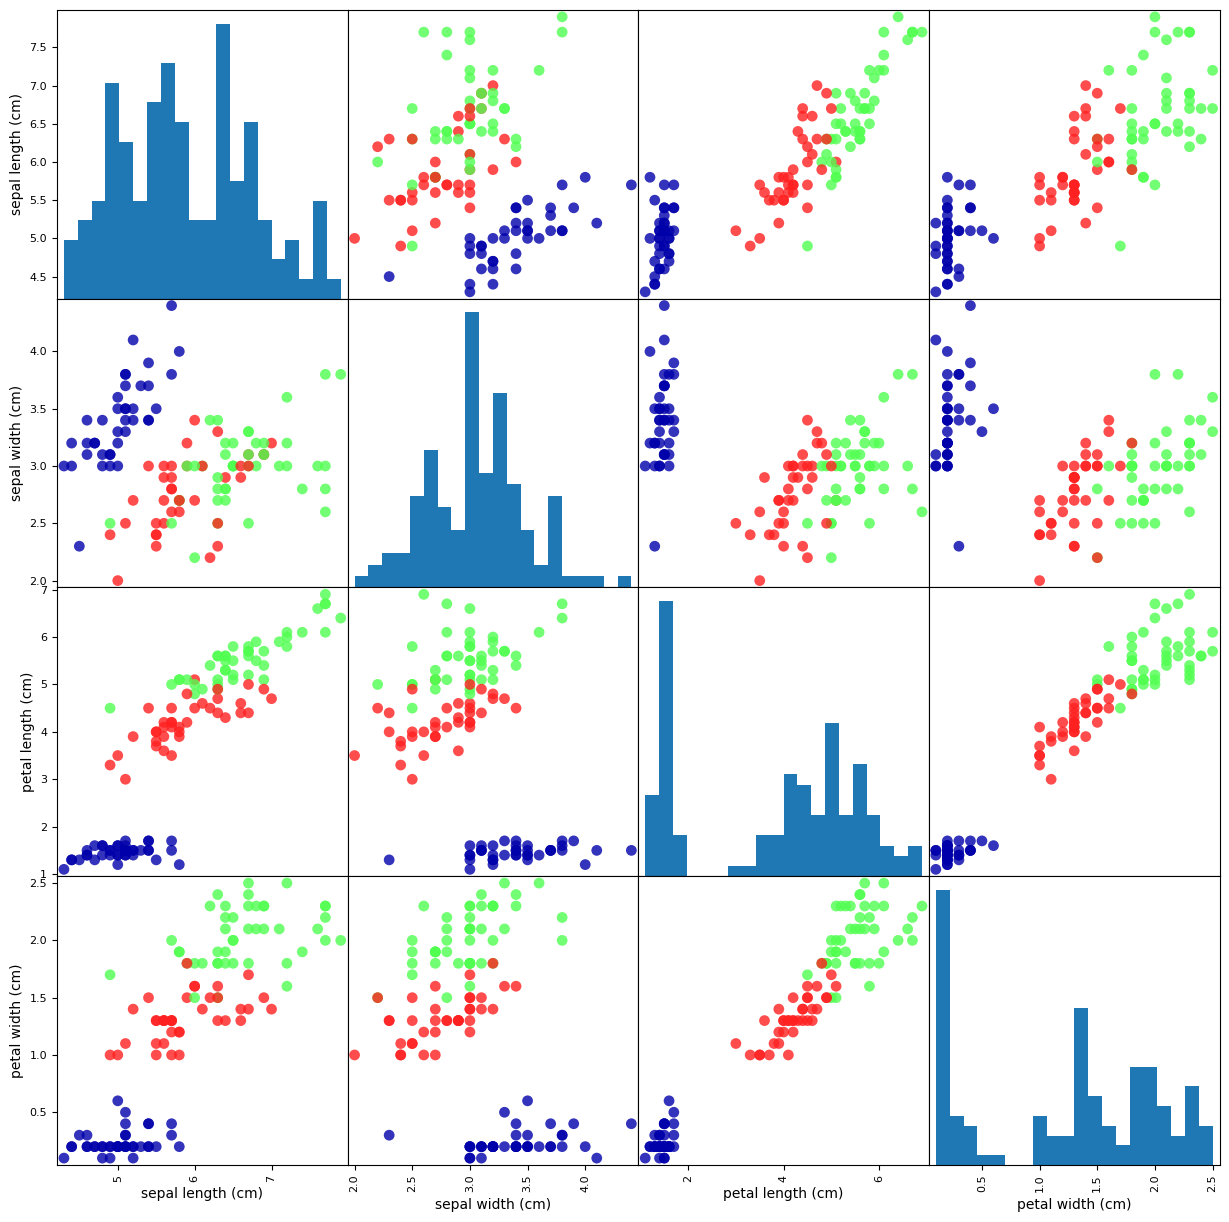

In [51]:
#create a dataframe from data in X_train
from pandas.plotting import scatter_matrix 
df = pd.DataFrame(X_train, columns=data.feature_names)

#Create a scatter matrix from the datsets
grr = scatter_matrix(df, c=y_train, figsize=(15, 15), marker='o', 
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
X_new = np.array([[6.4, 3.2 ,4.5, 10]])
print(f"X_new.shape {X_new.shape}")

X_new.shape (1, 4)


In [38]:
prediction = knn.predict(X_new)
print(f"Prediction: {prediction}")
print(f"Predicted Target: {data['target_names'][prediction]}")

Prediction: [1]
Predicted Target: ['versicolor']


# evaluation of model

In [24]:
y_pred = knn.predict(X_test)
print(f"Test set prediction:\n{y_pred}")

Test set prediction:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [30]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean-Squared Error: {mse}")
print("Test set score: {:.2f}".format(np.mean(y_pred==y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Mean-Squared Error: 0.0
Test set score: 1.00
Test set score: 1.00
